In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    """
    :param x: np.array(np.float) вектор длины 2
    :return: np.float
    """
    return 2 * pow(x[0], 2) + pow(x[1], 2) + x[0] * x[1] + x[0] + x[1]

In [3]:
def grad_f(x):
    """
    Градиент функциии f, определенной выше.
    :param x: np.array[2]: float вектор длины 2
    :return: np.array[2]: float вектор длины 2
    """
    return 4 * x[0] + x[1] + 1 + 2 * x[1] + x[0] + 1

In [4]:
def grad_descent_2d(f, grad_f, lr, num_iter, x0 = np.array([0, 0]).astype(float)):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных.
        :param f: скалярная функция двух переменных
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)

    # будем сохранять значения аргументов и значений функции
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла -- шаг градиентнго спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)

        curr_x -= lr * grad_f(curr_x)

    return np.vstack(history)

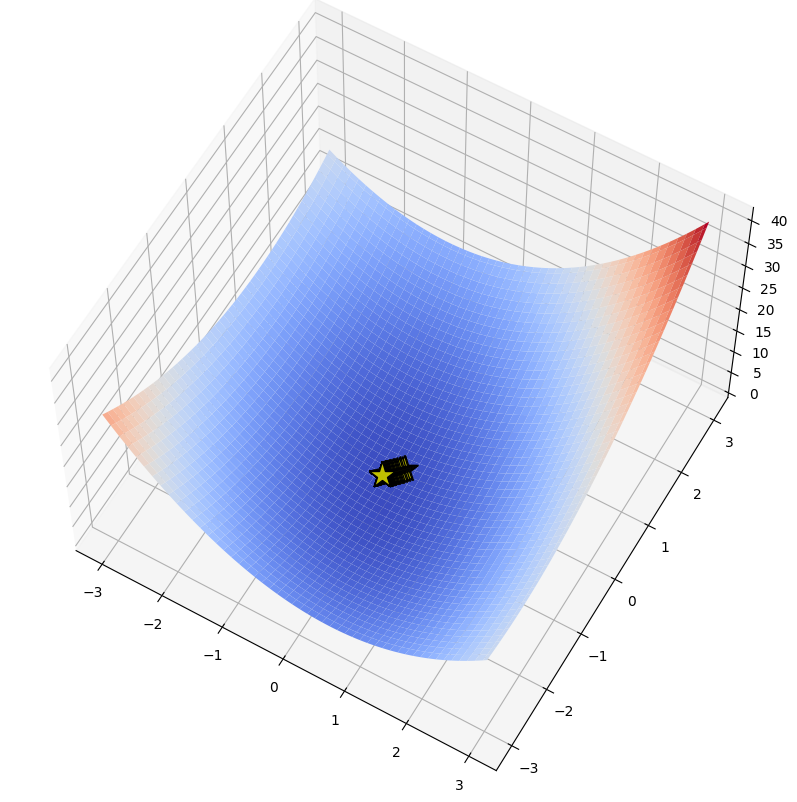

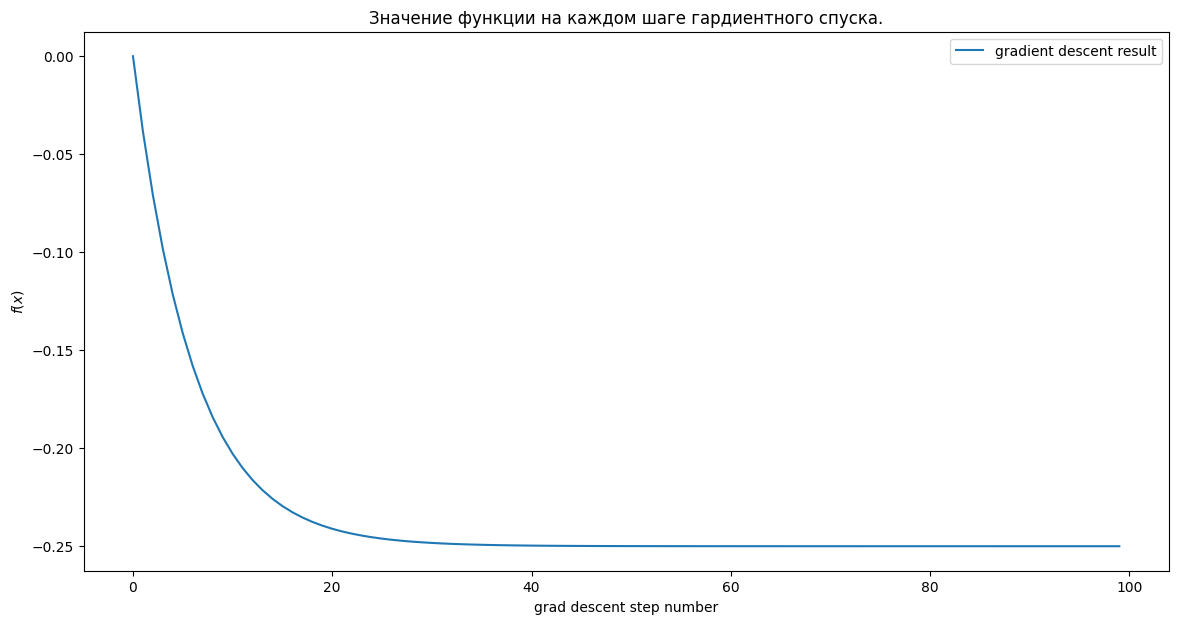

In [5]:
steps = grad_descent_2d(f, grad_f, lr=0.01, num_iter=100)

# %matplotlib osx
from matplotlib import cm

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(projection='3d')

zs = np.array([f(np.array([x,y]))
              for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3,
        markerfacecolor='y', lw=3, c='black')

# ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

plt.figure(figsize=(14,7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге гардиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()